In [1]:
import numpy as np
import matplotlib.pyplot as plt
from func import *
import gillespie

## DETERMINISTIC SOLUTIONS 

We descrive the systems with their differential equations.

### 1. NORMAL LOKTA-VOLTERRA

 $$
 \begin{cases}
 \dot{x}=x(r - ay -sx) \rightarrow Prey\\
 \dot{y}=y(bx - d) \rightarrow Predator
 \end{cases}
 $$

**Equilibria**
 $$
 \begin{cases}
 \hat{x}=d/b \\
 \hat{y}=r/a - sd/ab 
 \end{cases}
 $$


 
 Where the parameters are:
 - $\textbf{r}$: reproductive rate (Rate at which the prey repoduces, birth rate of the prey)
 - $\textbf{a}$: attack rate (Rate at which the predator hunts the prey, death rate of the prey)
 - $\textbf{b}$: beneffit rate (Rate at which the predator obtains beneffit from hunting a prey, birth rate of the prey)
 - $\textbf{d}$: deth rate (Rate at which the predator dies)
 - $\textbf{s}$: accounts for the self-regulation (inverse of the carrying capacity)

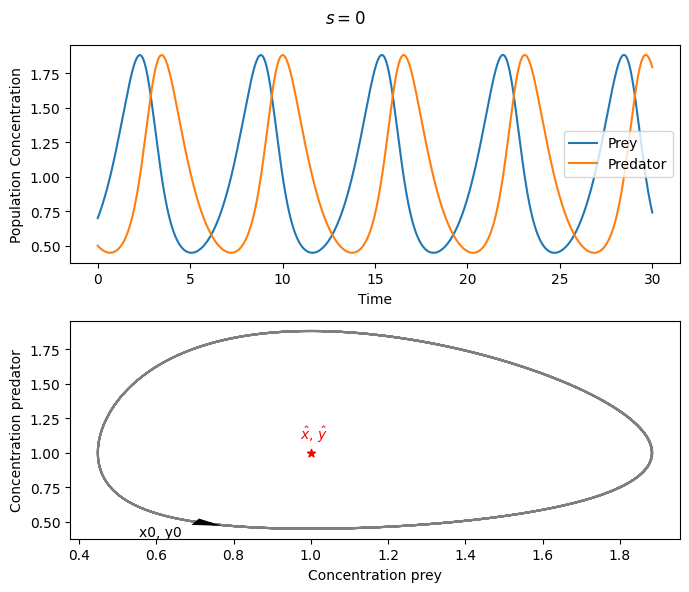

In [104]:
Lokta_Volterra_normal(0.7,0.5).plot_solutions(T=30,title=r'$s=0$')


Periodic behaviour around stable state

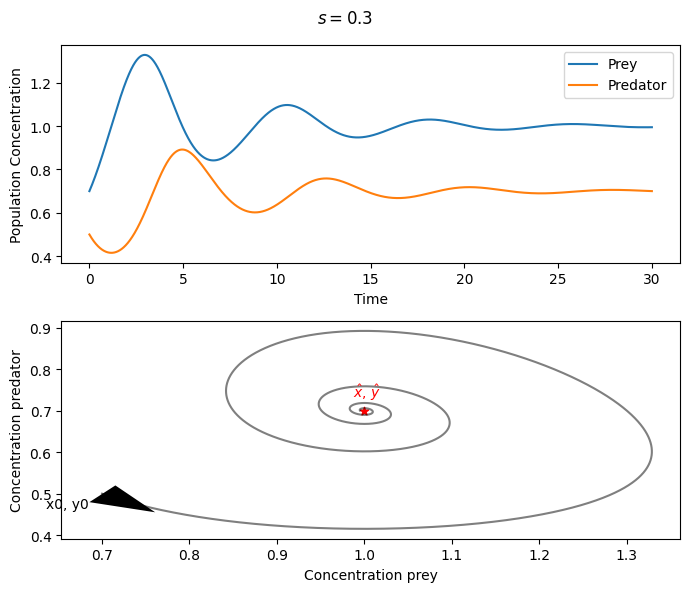

In [105]:
Lokta_Volterra_normal(0.7,0.5,s=0.3).plot_solutions(T=30,title=r'$s=0.3$')


Damped oscillations

### 2. TWO PREY LOKTA-VOLTERRA

 $$
 \begin{cases}
 \dot{x_1}= r\frac{x_1+x_2}{2} - a(1+\epsilon)x_1 y) \rightarrow Prey 1\\
 \dot{x_2}= r\frac{x_1+x_2}{2} - a(1-\epsilon)x_2 y) \rightarrow Prey 2\\
 \dot{y}=y(b[(1+\epsilon)x_1 + (1-\epsilon)x_2] - d) \rightarrow Predator
 \end{cases}
 $$

**Equilibria**
 $$
 \begin{cases}
 \hat{x_1}=\frac{d}{2b(1+\epsilon)} \\
 \hat{x_2}=\frac{d}{2b(1-\epsilon)} \\
 \hat{y}=\frac{r}{a} \frac{1}{1-\epsilon^2}
 \end{cases}
 $$


 
 Where the parameters are:
 - $\textbf{r}$: reproductive rate (Rate at which the prey repoduces, birth rate of the prey)
 - $\textbf{a}$: attack rate (Rate at which the predator hunts the prey, death rate of the prey)
 - $\textbf{b}$: beneffit rate (Rate at which the predator obtains beneffit from hunting a prey, birth rate of the prey)
 - $\textbf{d}$: deth rate (Rate at which the predator dies)
 - $\epsilon$: difference between the attack rate between the two phenotypes of preys.

Meaning of the model:
In this model we contaplate a prey that has two different phenotypes and a predator. 
- One of the preys has an attack rate greater than the other. It can be interpreted as one is hunted easier, dies more easily. (factor $1 \pm \epsilon$)
- The predator gets different beneffit from hunting the two different preys. (factor $1 \pm \epsilon$)
- Difference between beneffit and attack rate are proportional.
- When reproducing, the preys have the same probability of having any of the two phenotypes. The "parent" phenotype does not affect. (factor $r\frac{x_1+x_2}{2}$ equal for both)


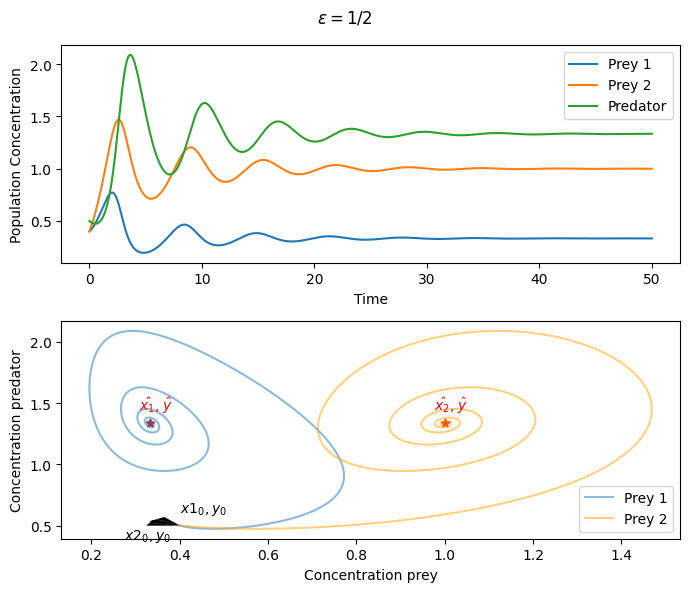

In [106]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/2,1/2)).plot_solutions(T=50,title=r'$\epsilon=1/2$')

Damped oscillations with different stable states.

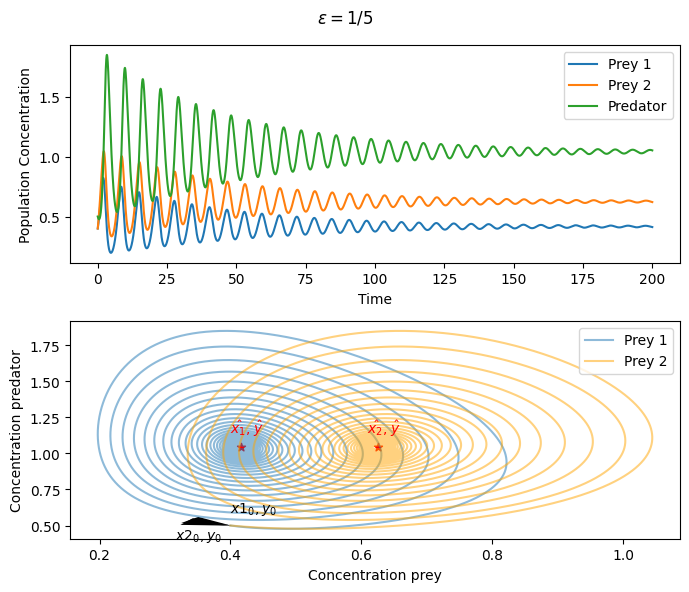

In [107]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/5,1/5)).plot_solutions(T=200,title=r'$\epsilon=1/5$')

For different values of $\epsilon$:
- $\epsilon$ is directly proportional to the distance of the two stable points
- $\epsilon$ is inversely proportional to the time taken to reach the stable state

### 3. TWO PREDATOR LOKTA-VOLTERRA

 $$
 \begin{cases}
 \dot{x}= x(r-a[y_1+y_2]) \rightarrow Prey\\
 \dot{y_1}= -d(1+\delta)y_1 + b\frac{y_1+y_2}{2}x \rightarrow Predator 1\\
 \dot{y_2}= -d(1-\delta)y_2 + b\frac{y_1+y_2}{2}x \rightarrow Predator 2
 \end{cases}
 $$

**Equilibria**
 $$
 \begin{cases}
 \hat{x}=\frac{d}{b}(1-\delta^2) \\
 \hat{y_1}=\frac{r}{a} \frac{1-\delta}{2} \\
 \hat{y_2}=\frac{r}{a} \frac{1+\delta}{2}
 \end{cases}
 $$


 
 Where the parameters are:
 - $\textbf{r}$: reproductive rate (Rate at which the prey repoduces, birth rate of the prey)
 - $\textbf{a}$: attack rate (Rate at which the predator hunts the prey, death rate of the prey)
 - $\textbf{b}$: beneffit rate (Rate at which the predator obtains beneffit from hunting a prey, birth rate of the prey)
 - $\textbf{d}$: deth rate (Rate at which the predator dies)
 - $\delta$: difference between the death rate between the two phenotypes of predators.

Meaning of the model:
In this model we contaplate a predator that has two different phenotypes and a prey. 
- One of the predators has a death rate greater than the other. It can be interpreted as one is weaker, dies more easily. (factor $1 \pm \delta$)
- The prey has the same attack rate from the two different predators. (same a)
- When reproducing, the predators have the same probability of having any of the two phenotypes. The "parent" phenotype does not affect. (factor $b\frac{y_1+y_2}{2}$ equal for both)


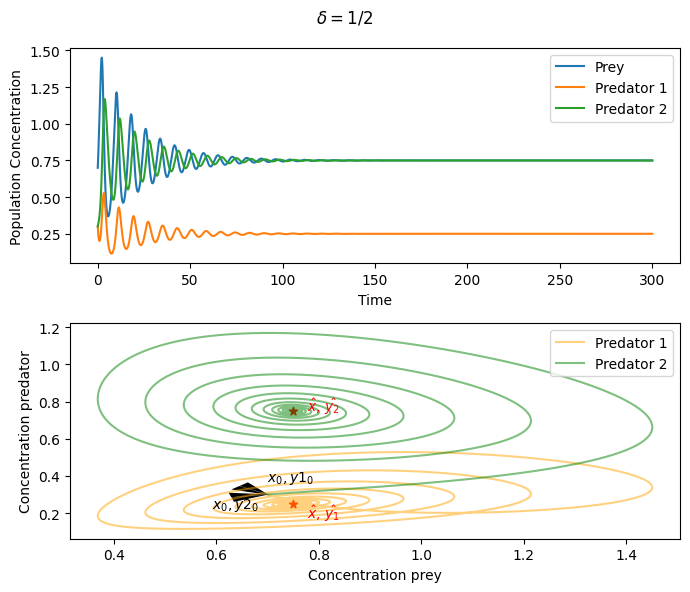

In [109]:
Lokta_Volterra_two_predator(0.7,0.3,0.3,delta=(1/2,1/2)).plot_solutions(T=300,title=r'$\delta=1/2$')

Damped oscillations with different stable states.

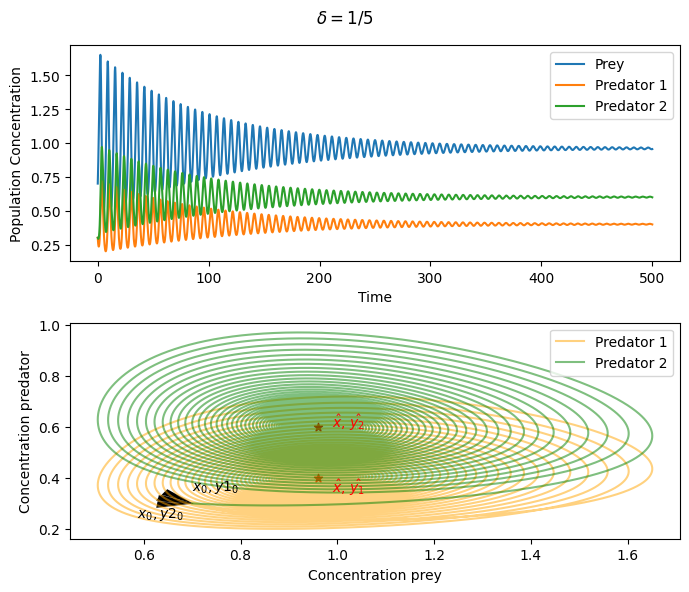

In [111]:
Lokta_Volterra_two_predator(0.7,0.3,0.3,delta = (1/5,1/5)).plot_solutions(T=500,title=r'$\delta=1/5$')

For different values of $\delta$:
- $\delta$ is directly proportional to the distance of the two stable points
- $\delta$ is inversely proportional to the time taken to reach the stable state

## STOCHASTIC SIMULATIONS

In order to add demographic noise to our systems we will simulate their master equations. Now the rates become probabilities and the noise is moduled with the numer $N$ of total individuals (inversely proportional). Note that $N$ is not really the number of infdivuduals, is just the scale of the concentratios x and y. We can say that $x·N$ and $y·N$ is the actual number of individuals.

### NORMAL LOKTA-VOLTERRA

**TRANSITIONS**
 $$
 \begin{cases}
 X \rightarrow X + X : r \\
 X + Y \rightarrow \emptyset + Y : a \\
 X + Y \rightarrow Y + Y : b \\
 Y \rightarrow \emptyset : d \\
 X + X \rightarrow X + \emptyset : s
 \end{cases}
 $$


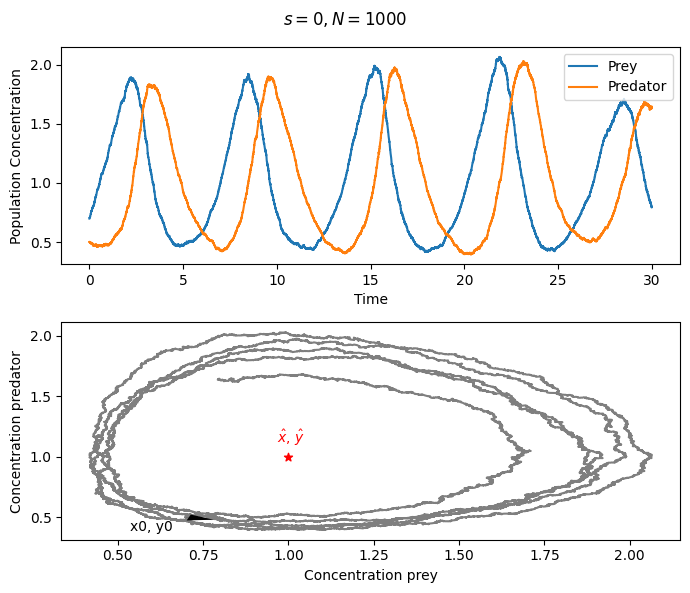

In [115]:
Lokta_Volterra_normal_simulation(0.7,0.5,N=1_000).plot_solutions(title=r'$s=0,N=1000$',T=30,step=0.001)

Same sustained oscillations but with noise.

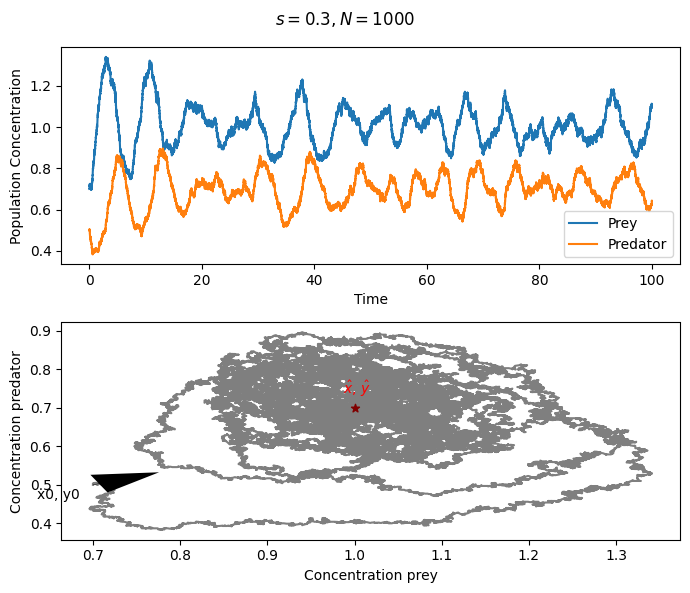

In [116]:
Lokta_Volterra_normal_simulation(0.7,0.5,N=1000,s=0.3).plot_solutions(title=r'$s=0.3,N=1000$',T=100,step=0.001)

Now we do not have damped oscillations. There are sustained oscillations wiht lower amplitude. The amplitude is directly proportional to the ammount of noise.

### TWO PREY

**TRANSITIONS**
 $$
 \begin{cases}
 X_i \rightarrow X_i + X_j : r/2 \\
 X_1 + Y \rightarrow \emptyset + Y : a(1+\epsilon) \\
 X_2 + Y \rightarrow \emptyset + Y : a(1-\epsilon) \\
 X_1 + Y \rightarrow Y + Y : b(1+\epsilon) \\
 X_2 + Y \rightarrow Y + Y : b(1-\epsilon) \\
 Y \rightarrow \emptyset : d \\
 \end{cases}
 $$

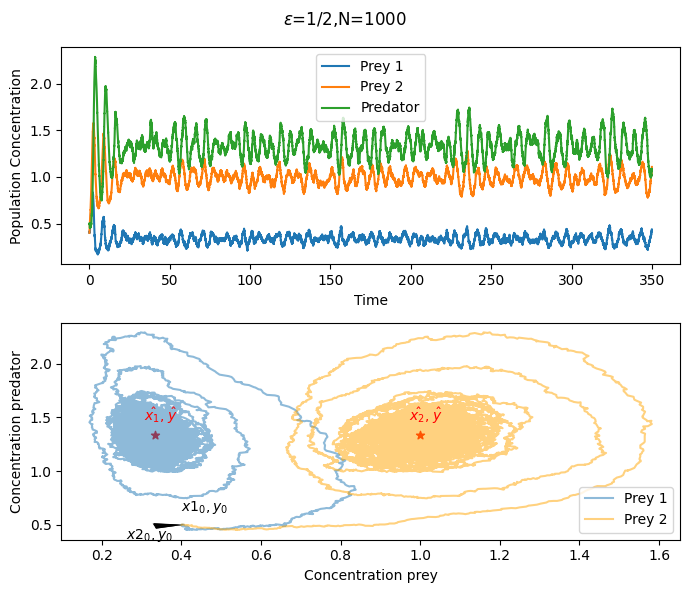

In [117]:
Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/2,1/2)).plot_solutions(title=r'$\epsilon$=1/2,N=1000',T=350,step=0.01)

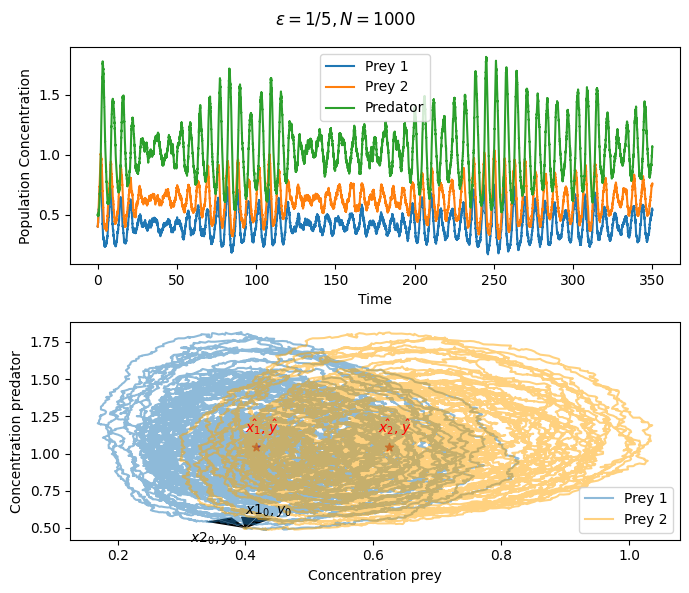

In [118]:
Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/5,1/5)).plot_solutions(title=r'$\epsilon=1/5,N=1000$',T=350,step=0.01)

For the case of greater $\epsilon$ we need a greater noise in order to sustain the oscillations. 
For the case of lower $\epsilon$ if we add the same noise ($N=100$) we can check that is too big and the system collapses and goes to 0. If we then add less noise ($N=1000$) we can check that the oscillatios are sustained.

### TWO PREDATOR

**TRANSITIONS**
 $$
 \begin{cases}
 X \rightarrow X + X : r\\
 X + Y_i \rightarrow \emptyset + Y_i : a \\
 X + Y_i \rightarrow Y_j + Y_i : b/2 \\
 Y_1 \rightarrow \emptyset : d(1+\delta) \\
 Y_2 \rightarrow \emptyset : d(1-\delta)
 \end{cases}
 $$

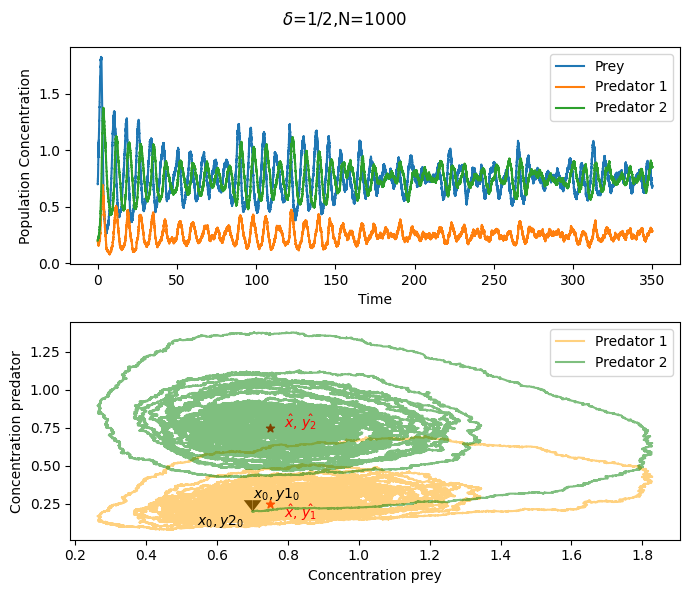

In [119]:
Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,N=1000,delta=(1/2,1/2)).plot_solutions(title=r'$\delta$=1/2,N=1000',T=350,step=0.001)

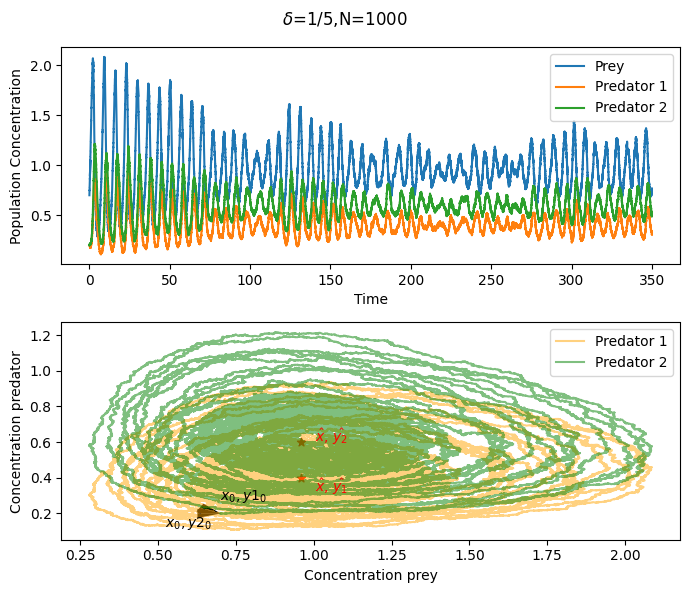

In [120]:
Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,N=1000,delta=(1/5,1/5)).plot_solutions(title=r'$\delta$=1/5,N=1000',T=350,step=0.001)

Now, surprisingly, we observer the contrary.
We need to add more less noise to the case for higher delta for the system to not collapse.
In addition, the noise added has to be generaly lower for the case of two predators compared to the two preys.
Again for a sufficintly high noise we see sutained oscillations.

## ECOEVOLUTION

Now we want to explore the possibility of having different probabilities of inheriting different phenotypes. We can consider this an approax to take into account the evolution of species. The parameter that will modulate this probabilities is $\rho$.

### TWO PREY

#### Deterministic

 $$
 \begin{cases}
 \dot{x_1}= r([ \rho x_1+ (1-\rho) x_2] - a(1+\epsilon)x_1 y) \\
 \dot{x_2}= r([ \rho x_2+ (1-\rho) x_1] - a(1-\epsilon)x_2 y) \\
 \dot{y}=y(b[(1+\epsilon)x_1 + (1-\epsilon)x_2] - d) 
 \end{cases}
 $$

In this model we take into account that the preys, when reproducing, can create a new individual with the same phenotype with probability $\rho$ and with different phenotype with probability $\rho$. We can understand this model as an evolutionary model since takes into account the phenotypes of the parents.

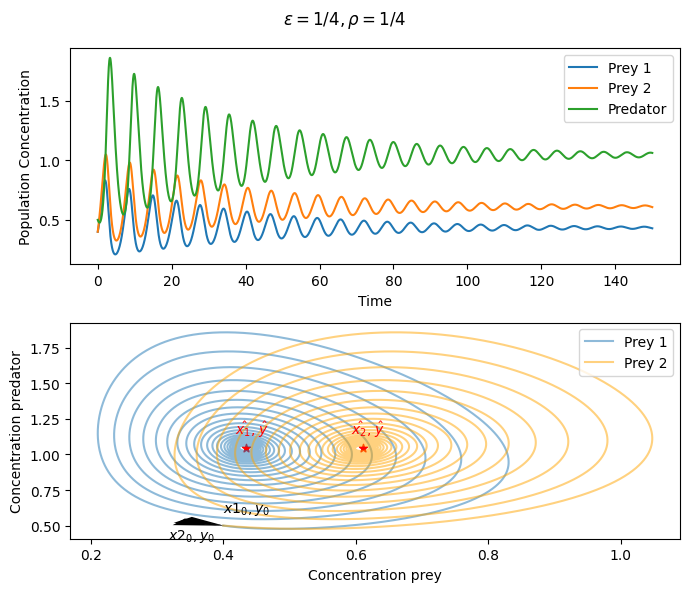

In [121]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/4,1/4),rho=1/4).plot_solutions(T=150,title=r'$\epsilon=1/4,\rho=1/4$')

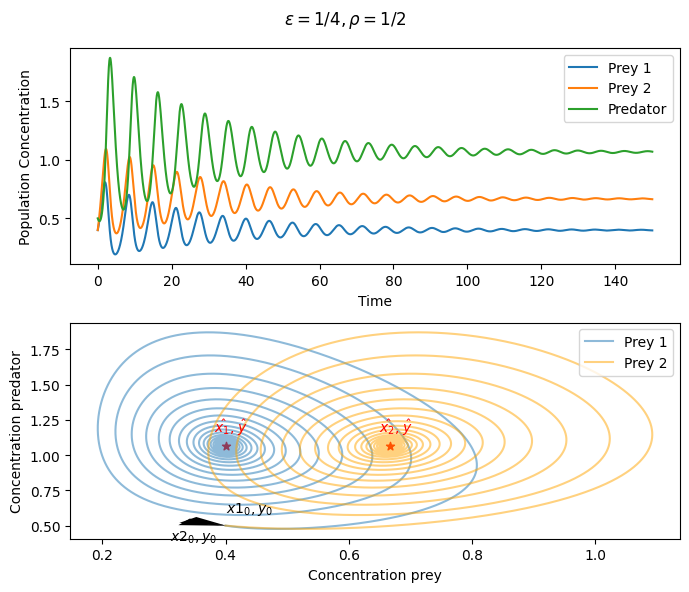

In [122]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/4,1/4),rho=2/4).plot_solutions(T=150,title=r'$\epsilon=1/4,\rho=1/2$')

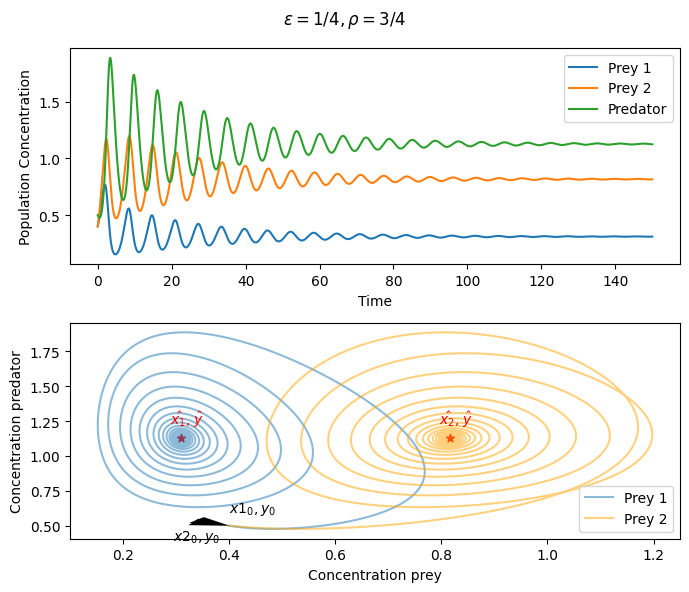

In [123]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/4,1/4),rho=3/4).plot_solutions(T=150,title=r'$\epsilon=1/4,\rho=3/4$')

We can see that the effect of the damping looks like faster for lower $\rho$. To check this phenomena we plot the maximum amplitude at around $t=100$.


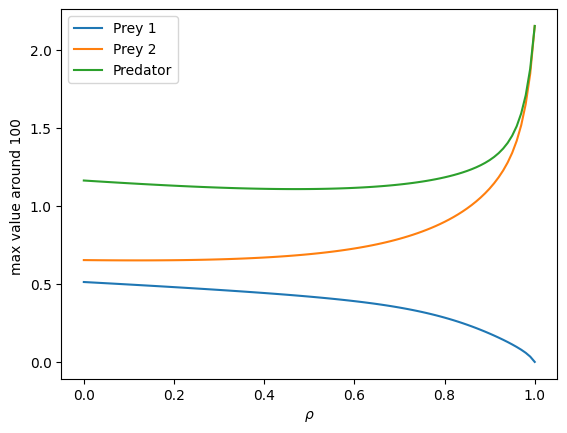

In [2]:
maximum_plot_prey()

We can see that the behaviour is true up to a certain value slightly above 0.9 where the maximum value for the predator and the more surviving prey increase rapidly and the one for the less surviving prey goes to 0. This last phenomena is expected since at $\rho=1$ we recover the classical Lokta-Volterra model.

#### With demographic noise


**TRANSITIONS**
 $$
 \begin{cases}
 X_i \rightarrow X_i + X_i : r\rho \\
 X_i \rightarrow X_i + X_j : r(1-\rho) \\
 X_1 + Y \rightarrow \emptyset + Y : a(1+\epsilon) \\
 X_2 + Y \rightarrow \emptyset + Y : a(1-\epsilon) \\
 X_1 + Y \rightarrow Y + Y : b(1+\epsilon) \\
 X_2 + Y \rightarrow Y + Y : b(1-\epsilon) \\
 Y \rightarrow \emptyset : d \\
 \end{cases}
 $$

[0.41774965 0.6645007  1.08225035]


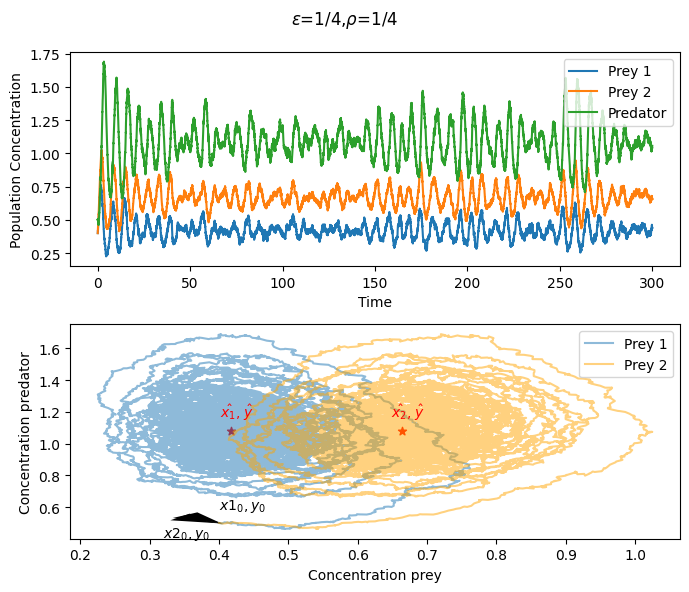

In [2]:
Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/3,1/3),rho=1/4).plot_solutions(title=r'$\epsilon$=1/4,$\rho$=1/4',T=300,step=0.01)

[0.375 0.75  1.125]


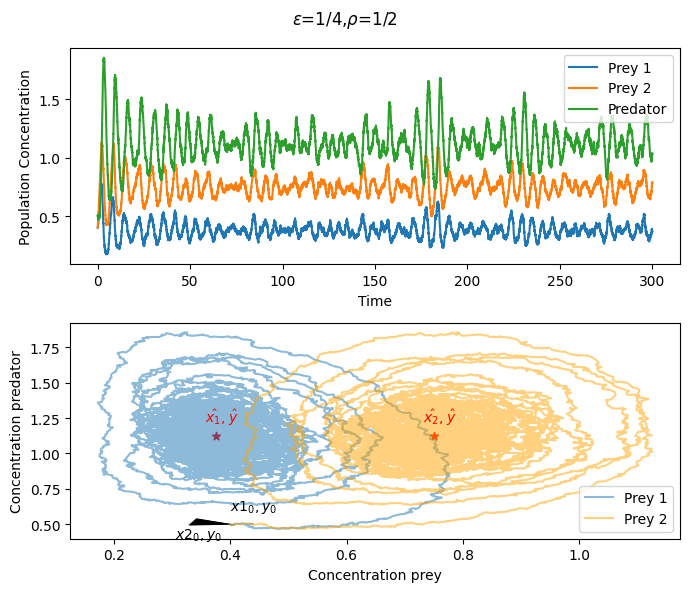

In [3]:
Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/3,1/3),rho=1/2).plot_solutions(title=r'$\epsilon$=1/4,$\rho$=1/2',T=300,step=0.01)

[0.31010205 0.81649658 1.12659863]


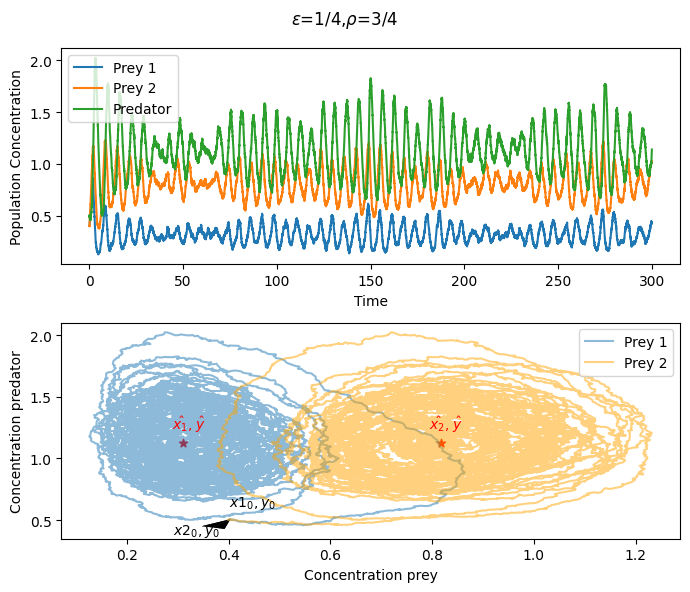

In [4]:
Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/4,1/4),rho=3/4).plot_solutions(title=r'$\epsilon$=1/4,$\rho$=3/4',T=300,step=0.01)

In [9]:
rho_1 = Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/4,1/4),rho=1/4).solutions(T=2000,step=0.01)
rho_2 = Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/4,1/4),rho=2/4).solutions(T=2000,step=0.01)
rho_3 = Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=(1/4,1/4),rho=3/4).solutions(T=2000,step=0.01)

$$Wider \leftarrow $$
$$
\rho = 1/4 > \rho = 1/2 > \rho = 3/4 
$$

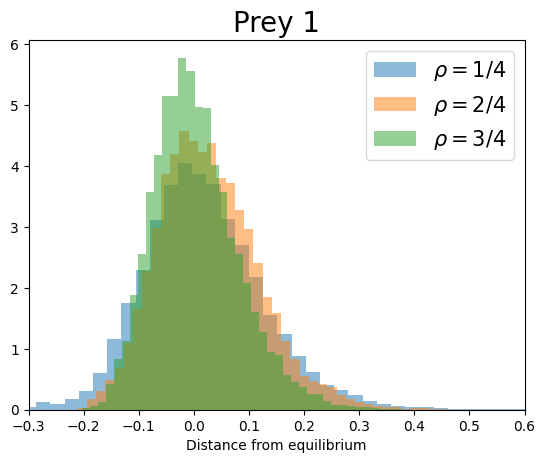

In [18]:
bins=40
plt.hist(rho_1[0][50:]-0.417,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[0][50:]-0.375,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[0][50:]-0.31,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Prey 1',fontsize=20)
plt.legend(fontsize=15)
plt.xlim(-0.3,0.6)
plt.xlabel('Distance from equilibrium')
plt.show()


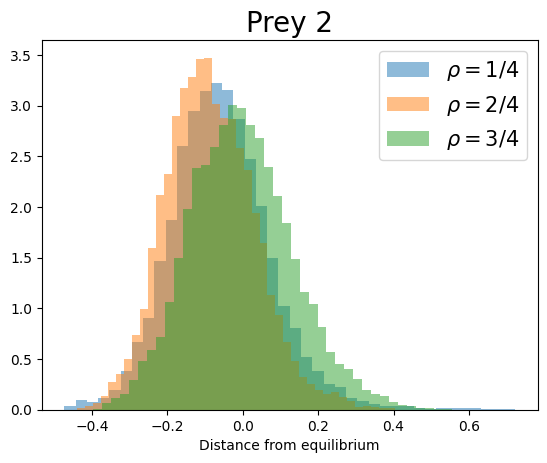

In [19]:
bins=40
plt.hist(rho_1[1][50:]-0.665,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[1][50:]-0.75,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[1][50:]-0.816,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Prey 2',fontsize=20)
plt.legend(fontsize=15)
#plt.xlim(-0.,1.5)
plt.xlabel('Distance from equilibrium')
plt.show()

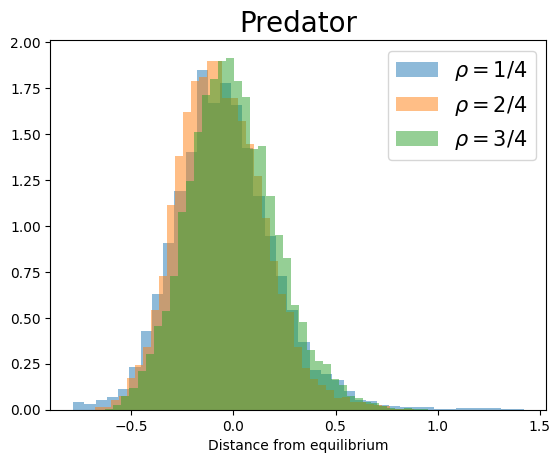

In [20]:
bins=40
plt.hist(rho_1[2][50:]-1.082,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[2][50:]-1.125,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[2][50:]-1.127,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Predator',fontsize=20)
plt.legend(fontsize=15)
#plt.xlim(0,2.5)
plt.xlabel('Distance from equilibrium')
plt.show()

We can see from the histograms that the oscillations are wider (more amplitude) for the smaller $\rho$. This can be seen since the distributions are higher so wider.

### TWO PREDATORS

#### Deterministic

 $$
 \begin{cases}
 \dot{x}= x(r-a[y_1+y_2])\\
 \dot{y_1}= -d(1+\delta)y_1 + b[\rho y_1+(1-\rho ) y_2]x\\
 \dot{y_2}= -d(1-\delta)y_2 + b[\rho y_2+(1-\rho ) y_1]x
 \end{cases}
 $$

In this model, when the predator reporduces, the probability of creating an individual with its same phenotype is $\rho$ while the probability of creating another individula with different phenotype is $1-\rho$. Usual values for $\rho$ should be greater than $1/2$ and can be interpreted as the fact that it is easier to inherit the same phenotype.

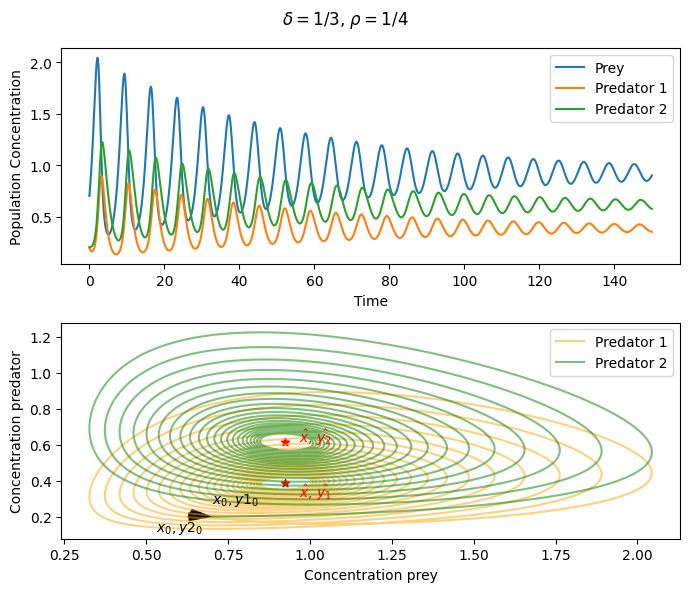

In [25]:
Lokta_Volterra_two_predator(0.7,0.2,0.2,delta=(1/3,+1/3),rho=1/4,change = 1).plot_solutions(T=150,title=r'$\delta=1/3$, $\rho=1/4$')

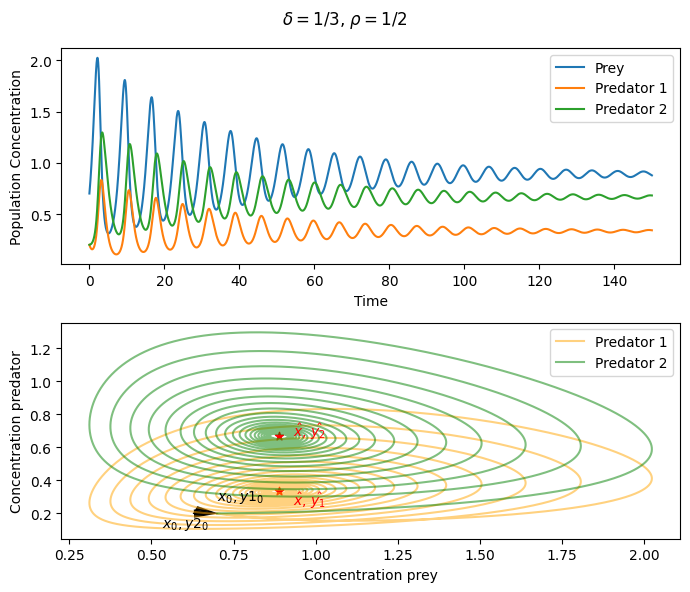

In [26]:
Lokta_Volterra_two_predator(0.7,0.2,0.2,delta=(1/3,+1/3),rho=1/2,change = 1).plot_solutions(T=150,title=r'$\delta=1/3$, $\rho=1/2$')

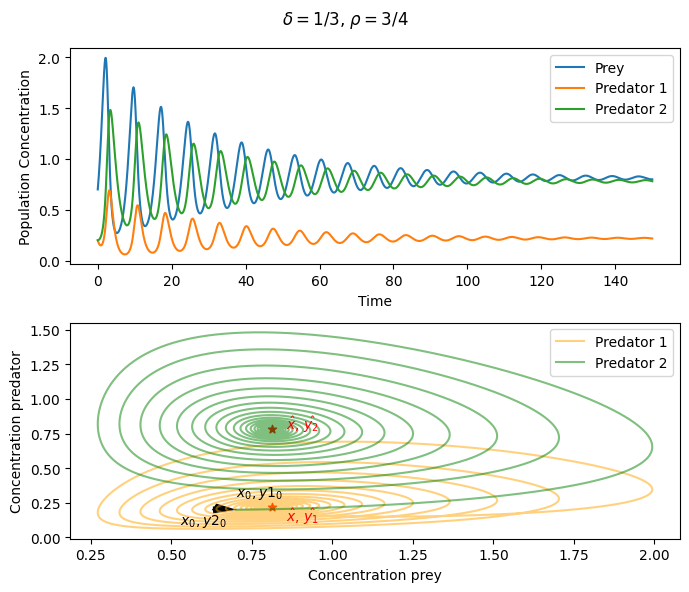

In [27]:
Lokta_Volterra_two_predator(0.7,0.2,0.2,delta=(1/3,+1/3),rho=3/4,change = 1).plot_solutions(T=150,title=r'$\delta=1/3$, $\rho=3/4$')

We can see that the effect of the damping looks like faster for lower $\rho$. To check this phenomena we plot the maximum amplitude at around $t=100$.


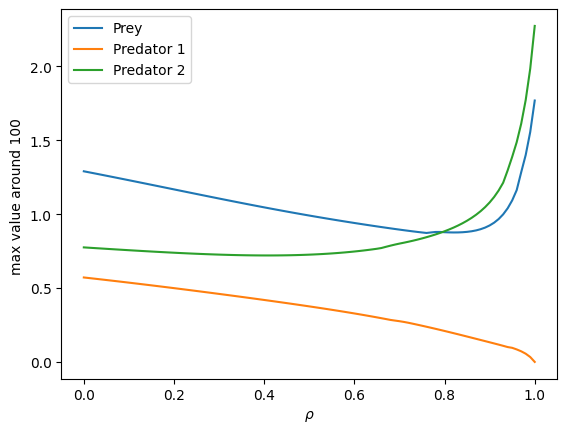

In [28]:
maximum_plot_predator()

We can see that the behaviour is true up to a certain value slightly above 0.9 where the maximum value for the prey and the more surviving predator increase rapidly and the one for the less surviving predator goes to 0. This last phenomena is expected since at $\rho=1$ we recover the classical Lokta-Volterra model.

#### With demographic noise

**TRANSITIONS**
 $$
 \begin{cases}
 X \rightarrow X + X : r\\
 X + Y_i \rightarrow \emptyset + Y_i : a \\
 X + Y_i \rightarrow Y_i + Y_i : \rho b \\
  X + Y_i \rightarrow Y_j + Y_i : (1-\rho) b \\
 Y_1 \rightarrow \emptyset : d(1+\delta) \\
 Y_2 \rightarrow \emptyset : d(1-\delta)
 \end{cases}
 $$

[0.92400062 0.38600094 0.61399906]


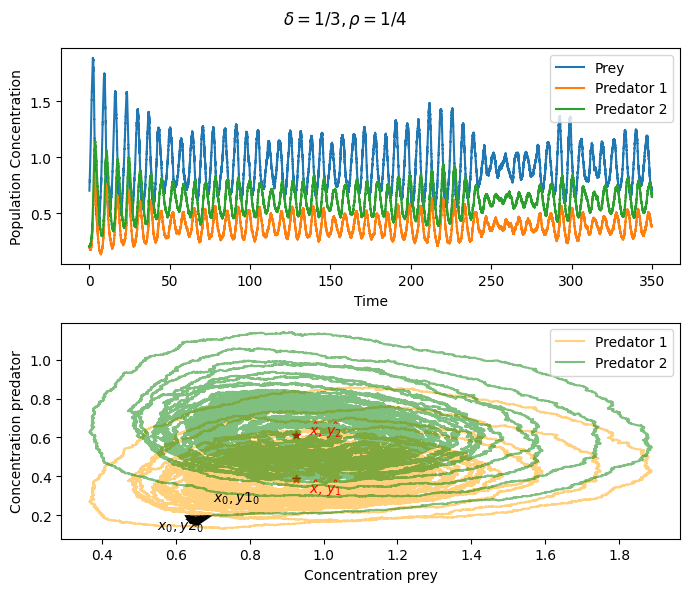

In [22]:
Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,delta=(1/3,-1/3),rho=1/4,change = 1, N=2_000).plot_solutions(T=350,title=r'$\delta=1/3,\rho=1/4$')

[0.88888889 0.33333333 0.66666667]


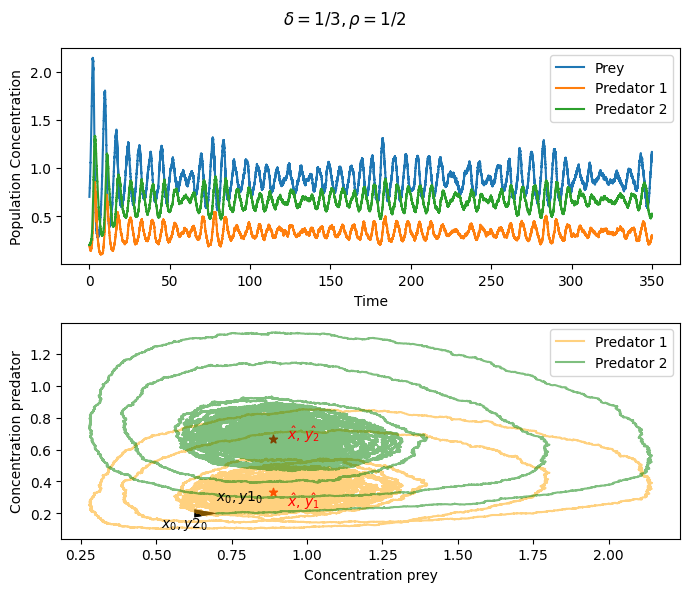

In [23]:
Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,delta=(1/3,-1/3),rho=2/4,change = 1, N=2_000).plot_solutions(T=350,title=r'$\delta=1/3,\rho=1/2$')

[0.81281573 0.21922359 0.78077641]


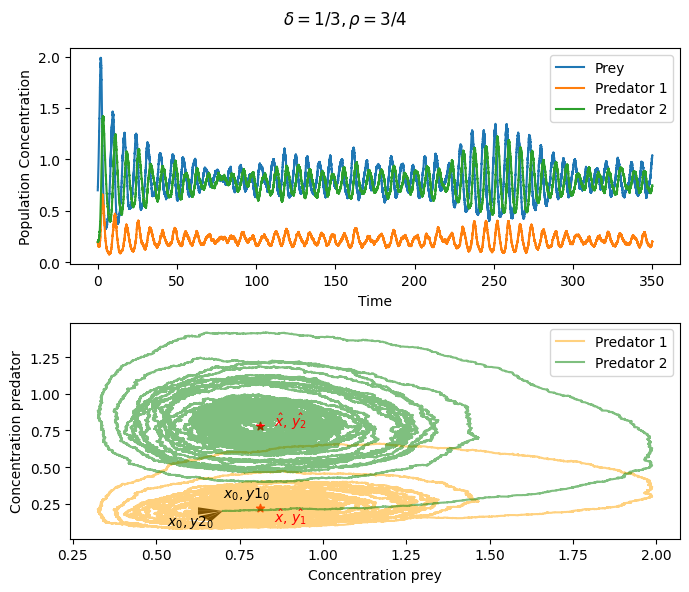

In [24]:
Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,delta=(1/3,-1/3),rho=3/4,change = 1, N=2_000).plot_solutions(T=350,title=r'$\delta=1/3,\rho=3/4$')

Here we can see an unexpected phenomena. Before we have seen that for lower values of $\rho$ the damping was slower but now we can check that for high values of the parameter, the sustained oscillations have a greater amplitude. We have avoided using values over 0.8 since reasemble the classic Lokta-Volterra model.

In [42]:
rho_1 = Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,N=2000,delta=(1/3,1/3),rho=1/4).solutions(T=2000,step=0.01)
rho_2 = Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,N=2000,delta=(1/3,1/3),rho=2/4).solutions(T=2000,step=0.01)
rho_3 = Lokta_Volterra_two_predator_simulation(0.7,0.2,0.2,N=2000,delta=(1/3,1/3),rho=3/4).solutions(T=2000,step=0.01)

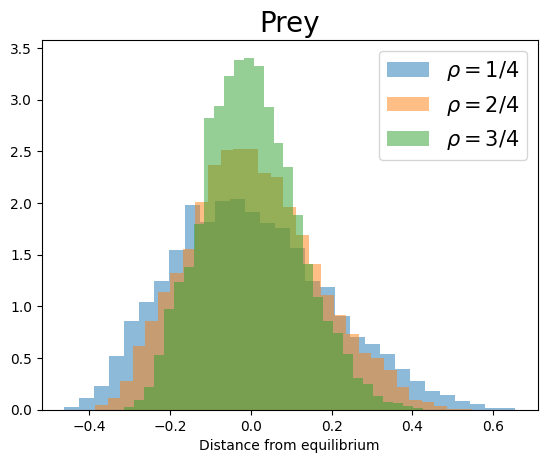

In [43]:
bins=30
plt.hist(rho_1[0][int(200/0.01):]-0.924,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[0][int(200/0.01):]-0.884,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[0][int(200/0.01):]-0.8128,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Prey',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distance from equilibrium')
plt.show()

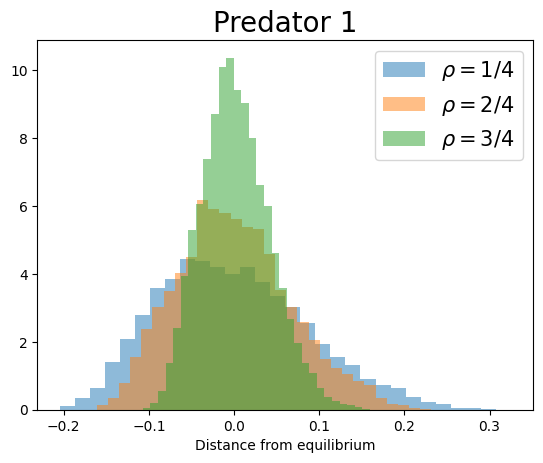

In [44]:
bins=30
plt.hist(rho_1[1][int(200/0.01):]-0.386,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[1][int(200/0.01):]-0.3333,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[1][int(200/0.01):]-0.219,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Predator 1',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distance from equilibrium')
plt.show()

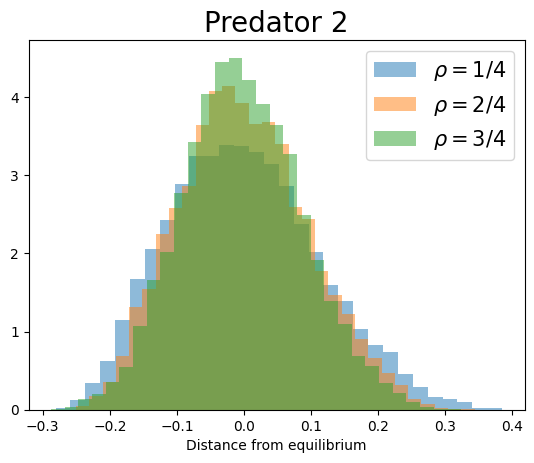

In [45]:
bins=30
plt.hist(rho_1[2][int(200/0.01):]-0.614,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[2][int(200/0.01):]-0.666,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[2][int(200/0.01):]-0.781,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Predator 2',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distance from equilibrium')
plt.show()

#### Differences 

- For the deterministic case we obtain the same results for the two models: $\rho$ is inversely proportional to the speed of the damping except for high values of $\rho$ where the models reasemble the classical Lokta-Volterra.
- For the stochastic case we obatin different results: 
    - 2 Preys: Greater $\rho$ $\rightarrow$ similar amplitude of sutained oscillations but around more distant stable points
    - 2 Preys: Greater $\rho$ $\rightarrow$ Lower amplitude sutained oscillations around more distant stable points

## ENVIROMENTAL NOISE

$$ Wider \leftarrow $$
$$ \rho = 3/4 > \rho = 1/2 > \rho = 1/4 $$

Now we want to check what are the result when adding enviromental noise. This means that the rates of our model vary through time. Since our study focuses on the 2 prey and 2 predator model we will add noise to the parameters $\epsilon$ and $\delta$. Intuitively I have come up with two types of noises:

- Flipping the sign of the $\delta$ (and $\epsilon$) for both predators (and preys). This can be interpreted as a brutal change in the enviroment that leads to a more swap in the survival probabilities of the different phenotypes. An example could be a sudden heat wave that makes the heat resistant species survive over the cold resistant ones (that survived more before).

- White noise for the parameters. Adding some white (Gaussian) noise to the parameters and check if we get siginificant variations in the systems (as for the noise added for random processes).

We are specially intereseted in the changes in the steady state.

### Flipping the sign of $\epsilon \ and \ \delta$

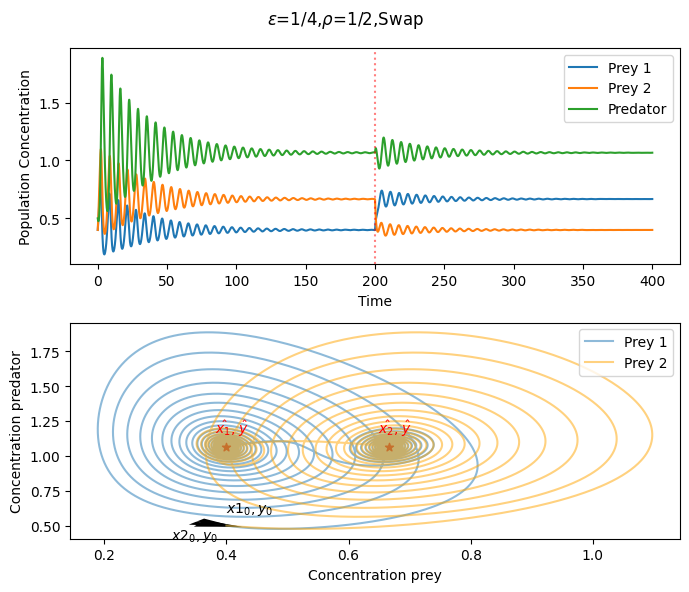

In [29]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/4,-1/4),rho=1/2,change=1/2).plot_solutions(title=r'$\epsilon$=1/4,$\rho$=1/2,Swap',T=400,step=0.01,line_change=True)

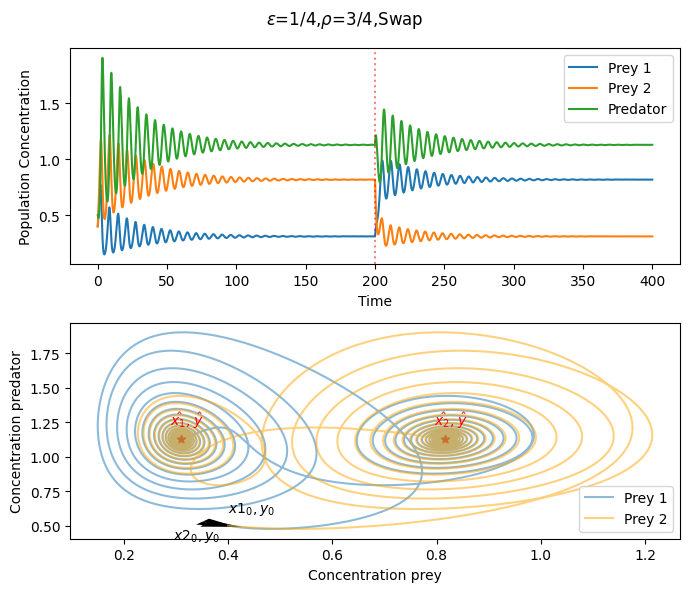

In [30]:
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=(1/4,-1/4),rho=3/4,change=1/2).plot_solutions(title=r'$\epsilon$=1/4,$\rho$=3/4,Swap',T=400,step=0.01,line_change=True)

As expected, this kind of noise makes the steady states of the two preys interchange. While doing so it creates a perturbation so new oscillations appear. What is more interesting is that for a theroetically more real case with inheritance, the amplitude of the perturbation is higher.

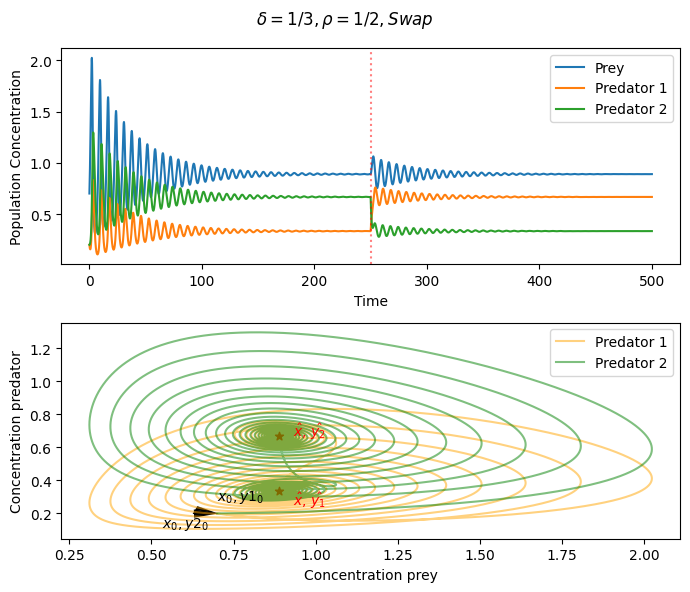

In [31]:
Lokta_Volterra_two_predator(0.7,0.2,0.2,delta=(1/3,-1/3),rho=1/2,change = 1/2).plot_solutions(T=500,title=r'$\delta=1/3,\rho=1/2,Swap$',line_change=True)

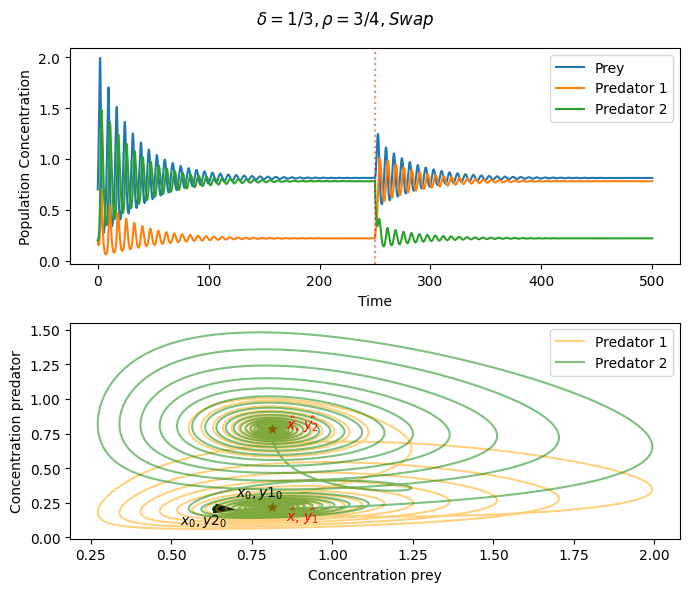

In [32]:
Lokta_Volterra_two_predator(0.7,0.2,0.2,delta=(1/3,-1/3),rho=3/4,change = 1/2).plot_solutions(T=500,title=r'$\delta=1/3,\rho=3/4,Swap$',line_change=True)

For the case of two predators we observe exactly the same results.

After seeing this results I came up with an idea. Can we periodically swap the sign in order to obtain sustained oscillations?
Let's try to check it.  
We do it with a high $\rho$ so the amplifications are greater and only for the prey case since the results are equal.

/home/guillermo/UNIPD/PMLS/PROJECT/func.py:133: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/guillermo/UNIPD/PMLS/PROJECT/func.py:150: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/guillermo/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/guillermo/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


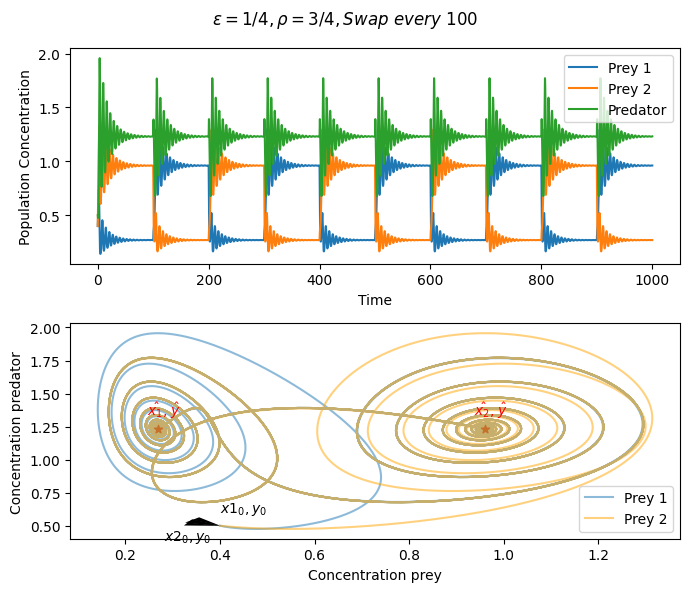

In [33]:
every = 100
times = 6
step_=0.001
epsilon_list = [1/3]*int(every/step_) + [-1/3]*int(every/step_)
epsilon_list = epsilon_list*times
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1/2, type='').plot_solutions(T=1000,step = step_,title=r'$\epsilon=1/4,\rho=3/4,Swap \  every  \ 100$',line_change=False)

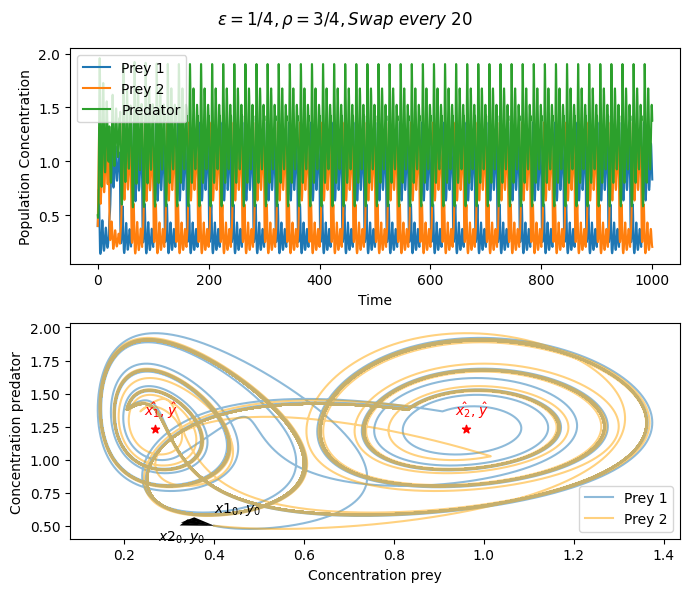

In [34]:
every = 100/5
times = 6*5
step_=0.001
epsilon_list = [1/3]*int(every/step_) + [-1/3]*int(every/step_)
epsilon_list = epsilon_list*times
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1/2, type='').plot_solutions(T=1000,step = step_,title=r'$\epsilon=1/4,\rho=3/4,Swap \  every \ 20$',line_change=False)

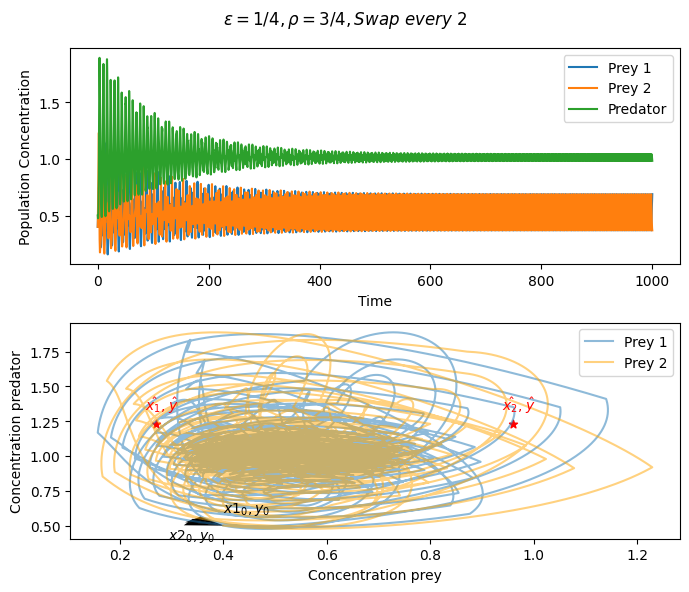

In [35]:
every = 100/50
times = 6*50
step_=0.001
epsilon_list = [1/3]*int(every/step_) + [-1/3]*int(every/step_)
epsilon_list = epsilon_list*times
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1/2, type='').plot_solutions(T=1000,step = step_,title=r'$\epsilon=1/4,\rho=3/4,Swap \  every \ 2$',line_change=False)

We observe three different states depending on the time interval between swaps:
- Great time: The system has time to stabilize between perturbations.
- Medium time: The system presents more or less constant oscillations.
- Small time: The two predators present a behaviour with small oscillations and same stable state.

### Gaussian noise

The noise is change every time step on the scale of time, not every time step of the euler method to get the solution

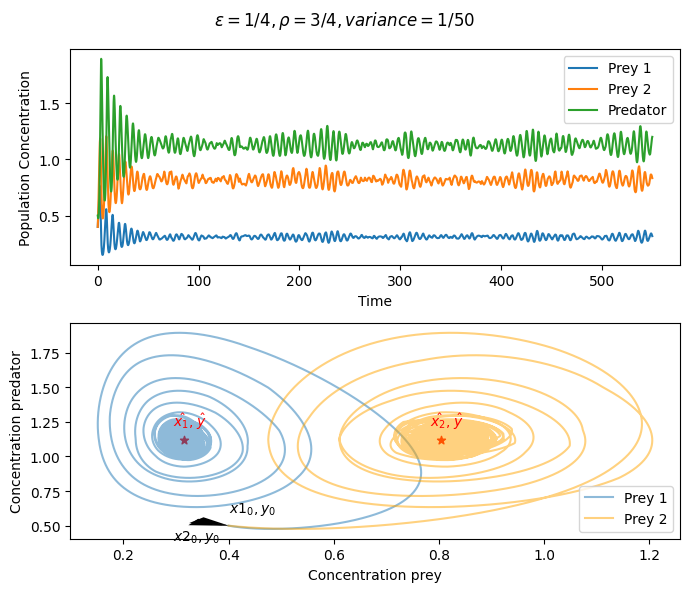

In [36]:
var = 1/50
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))
#epsilon_list = np.random.random(int(300/step_))
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1/2, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=3/4, variance = 1/50$',line_change=False)

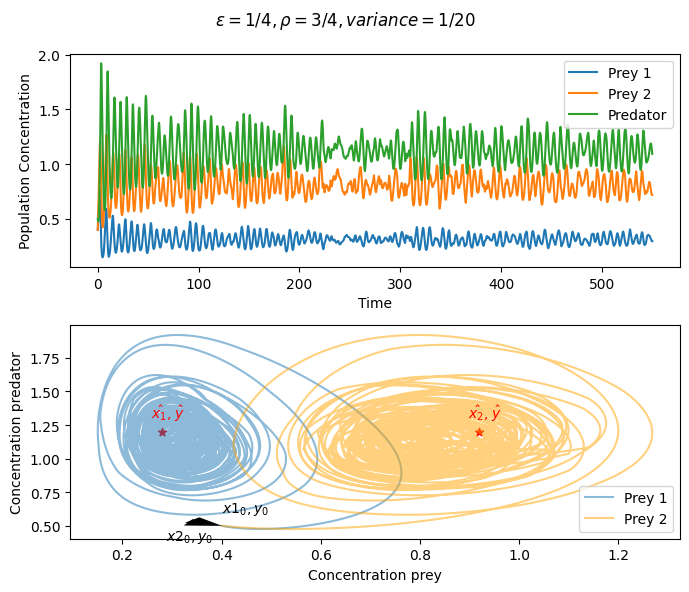

In [37]:
var = 1/20
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 3/4, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=3/4, variance = 1/20$',line_change=False)

In [ ]:
len(epsi

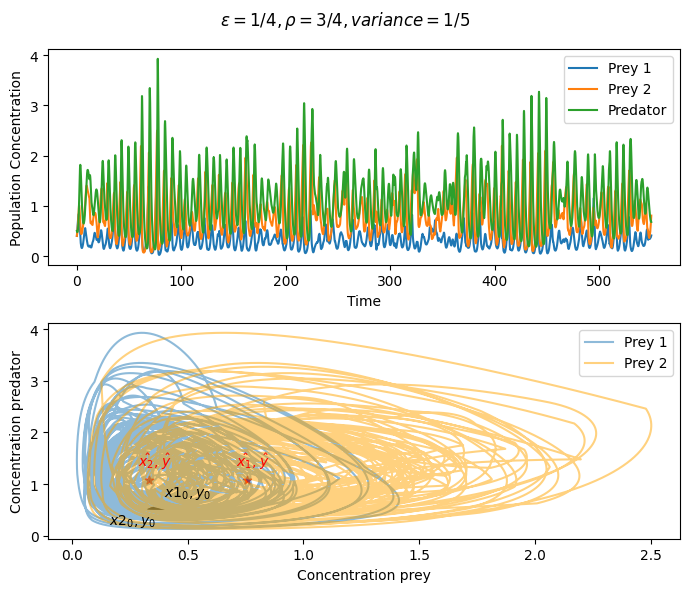

In [38]:
var = 1/5
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))
#epsilon_list = np.random.random(int(300/step_))
Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1/2, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=3/4, variance = 1/5$',line_change=False)


We find sutained oscillations when we add gaussian enviromental noise. What is interesting is that now the amplitude of the oscillations is block-like. What I mean is that we can observe modules waves with similar amplitude that last a significant time ($time_{module} \gg time_{noise}=1$). 

#### Different values of $\rho$

[0.43475167 0.60770655 1.04245822]


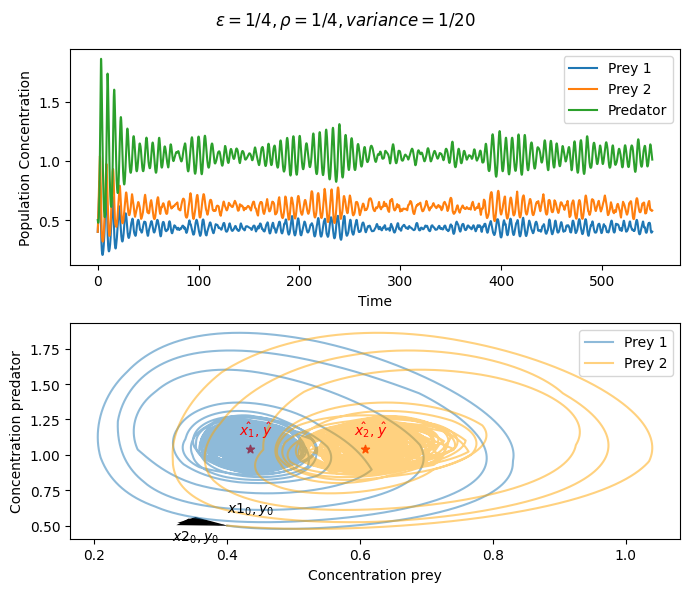

In [2]:
var = 1/20
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=1/4,change = 1, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=1/4, variance = 1/20$',line_change=False)


[0.43942562 0.57994481 1.01937043]


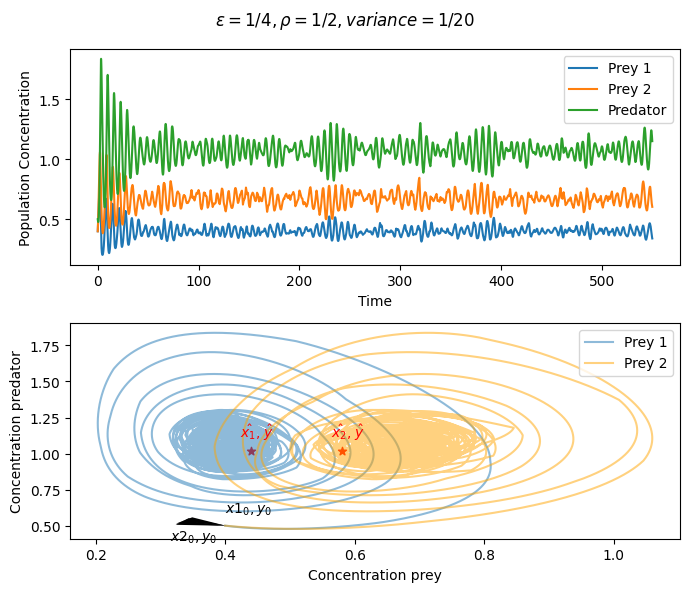

In [5]:
var = 1/20
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=1/2,change = 1, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=1/2, variance = 1/20$',line_change=False)


[0.29562081 0.86157703 1.15719784]


/home/guillermo/UNIPD/PMLS/PROJECT/func.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


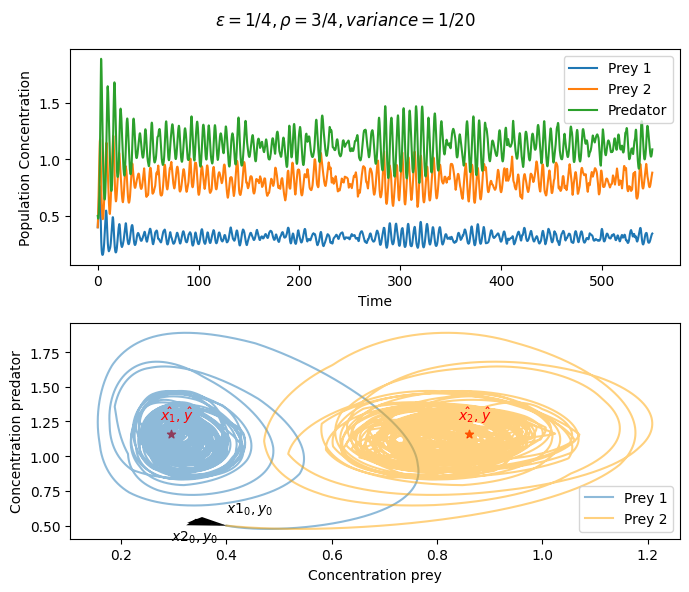

In [4]:
var = 1/20
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1, type='').plot_solutions(T=550,step = step_,title=r'$\epsilon=1/4,\rho=3/4, variance = 1/20$',line_change=False)


In [9]:
var = 1/20
step_ = 0.001
epsilon_list = np.random.normal(1/4, var,int(2100))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

rho_1 = Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=1/4,change = 1, type='').solutions(T=2000,step=0.001)
rho_2 = Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=2/4,change = 1, type='').solutions(T=2000,step=0.001)
rho_3 = Lokta_Volterra_two_prey(0.4,0.4,0.5,eps=epsilon_list,rho=3/4,change = 1, type='').solutions(T=2000,step=0.001)

Text(0.5, 0, 'Distances from equilibrium')

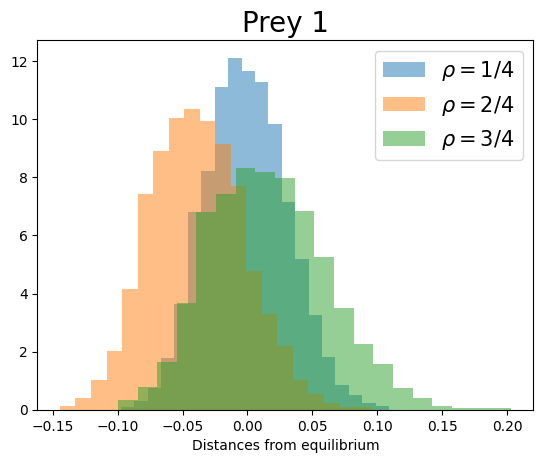

In [10]:
bins=20
plt.hist(rho_1[0][int(200/0.001):]-0.4347,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[0][int(200/0.001):]-0.4394,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[0][int(200/0.001):]-0.296,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Prey 1',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distances from equilibrium')
#plt.xlim(0,2)

Text(0.5, 0, 'Distances from equilibrium')

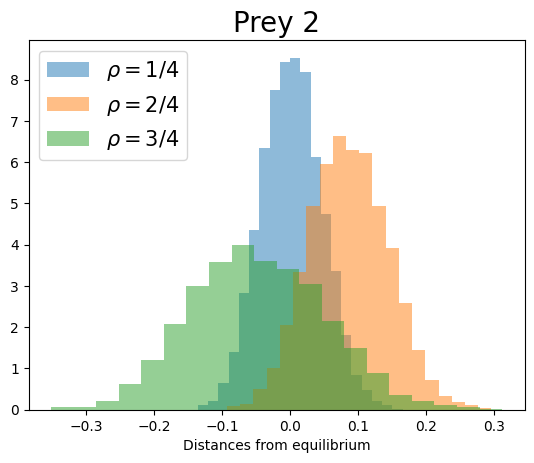

In [11]:
bins=20
plt.hist(rho_1[1][int(200/0.001):]-0.608,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[1][int(200/0.001):]-0.580,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[1][int(200/0.001):]-0.861,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Prey 2',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distances from equilibrium')
#plt.xlim(0,2)

Text(0.5, 0, 'Distances from equilibrium')

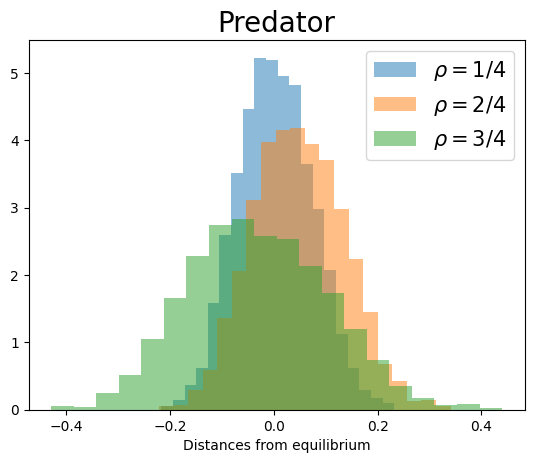

In [12]:
bins=20
plt.hist(rho_1[2][int(200/0.001):]-1.042,alpha=0.5,bins=bins,density=True,label=r'$\rho = 1/4$')
plt.hist(rho_2[2][int(200/0.001):]-1.019,alpha=0.5,bins=bins,density=True,label=r'$\rho = 2/4$')
plt.hist(rho_3[2][int(200/0.001):]-1.157,alpha=0.5,bins=bins,density=True,label=r'$\rho = 3/4$')
plt.title('Predator',fontsize=20)
plt.legend(fontsize=15)
plt.xlabel('Distances from equilibrium')
#plt.xlim(0,2)

We can see that for bigger $\rho$ we get higher oscillations. This results differes from the ones obtained for the demographical noise.

## MIXTURE (PARTY!!)

Let's mix enviromental and demographic noise together and check wheter we see something interesting. (Probably a lot of noise). I am going to use the parameters which I consider that are more standard (no crazy gridsearch).

[0.30290311 0.83815515 1.14105826]


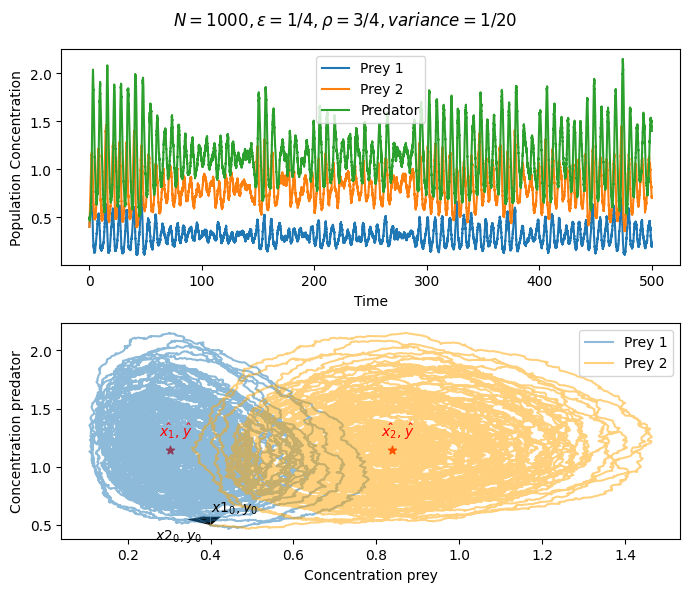

In [13]:
var = 1/20
step_ = 0.01
epsilon_list = np.random.normal(1/4, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_prey_simulation(0.4,0.4,0.5,N=1000,eps=epsilon_list,rho=3/4,change = 1, type='').plot_solutions(T=500,step = step_,title=r'$N=1000,\epsilon=1/4,\rho=3/4, variance = 1/20$',line_change=False)


[0.79184925 0.20649641 0.79350359]


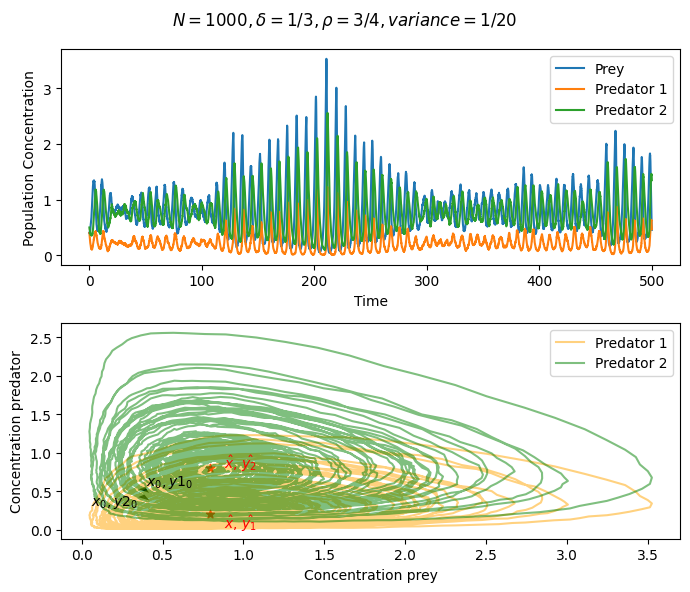

In [14]:
var = 1/20
step_ = 0.05
epsilon_list = np.random.normal(1/3, var,int(600))
epsilon_list = np.repeat(epsilon_list, int(1/step_))

Lokta_Volterra_two_predator_simulation(0.4,0.4,0.5
                                       ,N=1000,delta=epsilon_list,rho=3/4,change = 1, type='').plot_solutions(T=500,step = step_,title=r'$N=1000,\delta=1/3,\rho=3/4, variance = 1/20$',line_change=False)


Both noises add up together and we obtain even higher oscillations.

# GILLESPIE

**TRANSITIONS**
 $$
 \begin{cases}
 X_i \rightarrow X_i + X_j : r/2 \\
 X_1 + Y \rightarrow \emptyset + Y : a(1+\epsilon) \\
 X_2 + Y \rightarrow \emptyset + Y : a(1-\epsilon) \\
 X_1 + Y \rightarrow Y + Y : b(1+\epsilon) \\
 X_2 + Y \rightarrow Y + Y : b(1-\epsilon) \\
 Y \rightarrow \emptyset : d \\
 \end{cases}
 $$

In [113]:
r=1
a=1
b=1
d=1
eps=
rho = 3/4


N=3000
initials = [2*N, 2*N, 3*N]

propensities = [lambda x1, x2, y: r*rho*x1,
                lambda x1, x2, y: r*(1-rho)*x1,
                lambda x1, x2, y: r*(1-rho)*x2,
                lambda x1, x2, y: r*rho*x2,
                lambda x1, x2, y: a*(1+eps)*x1*y/N,
                lambda x1, x2, y: a*(1-eps)*x2*y/N,
                lambda x1, x2, y: b*(1+eps)*x1*y/N,
                lambda x1, x2, y: b*(1-eps)*x2*y/N,
                lambda x1, x2, y: d*y]

stoichiometry = [[1, 0, 0],
                 [0, 1, 0],
                 [1, 0, 0],
                 [0, 1, 0],
                 [-1, 0, 0],
                 [0, -1, 0],
                 [-1, 0, 1],
                 [0, -1, 1],
                 [0, 0, -1]]

times, measurements = gillespie.simulate(initials, propensities, stoichiometry, duration=100)

X1, X2, Y = zip(*measurements)



In [119]:
times[10]-times[11]

-2.070226157880108e-05

In [120]:
times[20]-times[21]

-1.3001729738746867e-05

(0.0, 100.0)

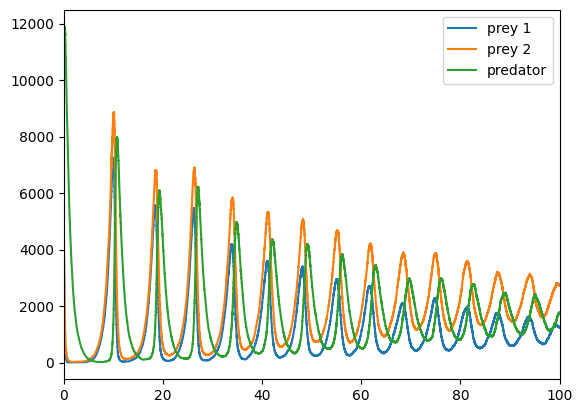

In [117]:
plt.plot(times,X1,label='prey 1')
plt.plot(times,X2,label='prey 2')
plt.plot(times,Y, label='predator')
plt.legend()
plt.xlim(0,100)

(0.0, 100.0)

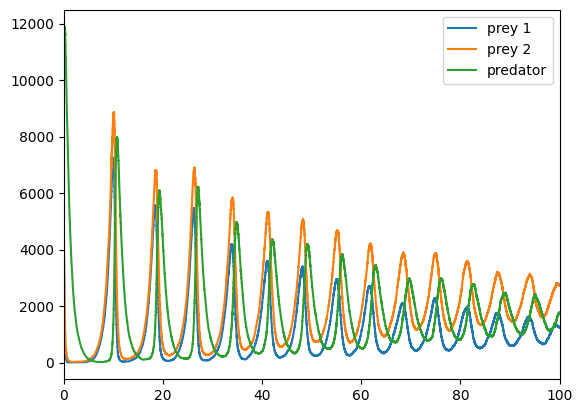

In [116]:
plt.plot(times,X1,label='prey 1')
plt.plot(times,X2,label='prey 2')
plt.plot(times,Y, label='predator')
plt.legend()
plt.xlim(0,100)

In [126]:
np.array(X1)[0]

6000